This dataset contains data of an insurance company provided by Onyx data.

* **marital_status**: Gives information about the marital status of customers; married, single,divorced, seperated.
* **Car_use**: Gives information about the purpose of the car if it is for commercial use or private.
* **gender**: Gives information about the the gender of the customers male or female.
* **Parent**: If a customer is a parent or not.
* **Education**: Gives information about the level of education of the customers.
* **car_make**: Gives information about which car manufacturer a customrr is using e.g Acura, Nissan.
* **car_year**: Gives information about year the car came out.
* **car_color**: Gives information about the color of the car
* **claim_freq**: Gives information about the number of times a customer has claimed insurance.
* **coverage_zone**: Gives information about the area in which the service is being provided; urban,suburban, rural, highly urban and highly rural
* **claim_amt**: Gives information about amount of monry to be claimed by the customer.
* **household_income**: Gives information about income of the customers


In [3]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from datetime import datetime
from datetime import timedelta
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [4]:
#import data
car = pd.read_csv("car insurance.csv")
car.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23


In [5]:
car[car.duplicated()]

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income


In [6]:
#checking for null values
car.isnull().sum()

ID                  0
birthdate           0
marital_status      0
car_use             0
gender              0
kids_driving        0
parent              0
education           0
car_make            0
car_model           0
car_color           0
car_year            0
claim_freq          0
coverage_zone       0
claim_amt           0
household_income    0
dtype: int64

In [7]:
#getting the year of birth in a column
car['birth']= car['birthdate'].str[-4:]
car.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,1962
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,1988
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,1999
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,1959
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,1992


In [8]:
car['date']=pd.Series(2023, index=car.index)
car.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,1962,2023
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,1988,2023
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,1999,2023
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,1959,2023
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,1992,2023


In [9]:
#getting the age of the customers
car['birth']= car['birth'].astype(int)
car['Age']=car['date'] - car['birth']
car.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date,Age
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,1962,2023,61
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,1988,2023,35
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,1999,2023,24
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,1959,2023,64
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,1992,2023,31


## Distribution of customers 

In [10]:
pd.value_counts(car['gender'].values)

Female    18806
Male      18736
dtype: int64

In [11]:
pd.value_counts(car['education'].values)

Bachelors      18701
High School    10439
Masters         5640
PhD             2762
dtype: int64

In [12]:
pd.value_counts(car['marital_status'].values)

Single       15525
Married      12570
Divorced      6357
Seperated     3090
dtype: int64

In [13]:
pd.value_counts(car['parent'].values)

No     20932
Yes    16610
dtype: int64

In [14]:
pd.value_counts(car['car_make'].values)

Ford          3302
Chevrolet     2954
Dodge         1843
Toyota        1809
GMC           1751
              ... 
MG               5
Fillmore         5
Rambler          5
Hillman          3
Fairthorpe       2
Length: 78, dtype: int64

In [15]:
pd.value_counts(car['car_color'].values)

Turquoise     2078
Aquamarine    2020
Green         2016
Pink          2011
Blue          2002
Khaki         1993
Crimson       1990
Violet        1989
Yellow        1983
Teal          1977
Fuscia        1974
Red           1961
Maroon        1954
Puce          1947
Purple        1942
Indigo        1941
Goldenrod     1935
Orange        1915
Mauv          1914
dtype: int64

In [16]:

pd.value_counts(car['car_use'].values)

Private       30060
Commercial     7482
dtype: int64

In [17]:
pd.value_counts(car['claim_freq'].values)

0    27203
1     5912
3     1516
2     1473
4     1438
dtype: int64

In [18]:
average=car['claim_amt'].mean()
print("Average claim amount:" ,average)

Average claim amount: 50028.51409621209


In [19]:
average=car['household_income'].mean()
print("Average household income:" ,average)

Average household income: 147247.4077497206


## Exploring the claim frequencies based on different demographics

In [20]:
#what is the average claim amount?
average=car['claim_freq'].mean()
print("Average claim frequency:" ,average)

Average claim frequency: 0.5103084545309253


### Claim frequency by gender and marital status

In [21]:
#group by gender and marital status
claims= car.groupby(['gender', 'marital_status'])['claim_freq'].mean().reset_index()
claims.head(10)

,gender,marital_status,claim_freq
0,Female,Divorced,0.502696
1,Female,Married,0.511632
2,Female,Seperated,0.537201
3,Female,Single,0.516594
4,Male,Divorced,0.481898
5,Male,Married,0.528799
6,Male,Seperated,0.529920
7,Male,Single,0.493174


<Figure size 576x720 with 0 Axes>

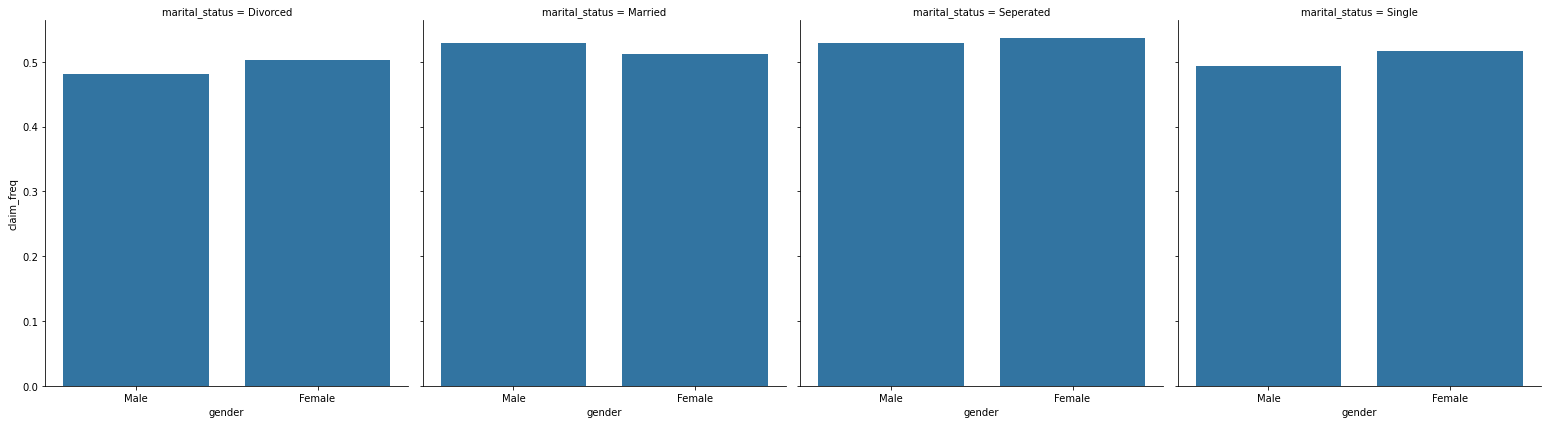

In [22]:
plt.figure(figsize=(8,10))
x= sns.FacetGrid(claims ,col='marital_status', height=6, aspect=.9)
x.map(sns.barplot,'gender' ,'claim_freq', order=['Male','Female'])
plt.show()


#### Women who are single, seperated, divorced have a slightly higher claim frequency than men whie only married men have a higher claim frequency that women

In [23]:
# claim frequency grouped by parental status
parent= car.groupby(['parent'])['claim_freq'].mean().reset_index()
parent.head(10)

,parent,claim_freq
0,No,0.510032
1,Yes,0.510656


Text(0.5, 1.0, 'Claim freq by Education')

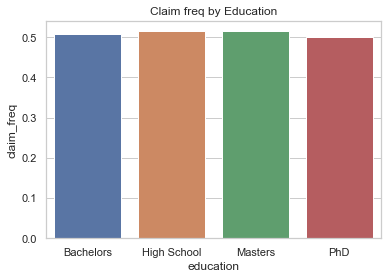

In [24]:
#group by level of education
edu= car.groupby(['education'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
sns.barplot(x='education', y='claim_freq', data=edu)
plt.title('Claim freq by Education')

Text(0.5, 1.0, 'Claim freq by coverage_zone')

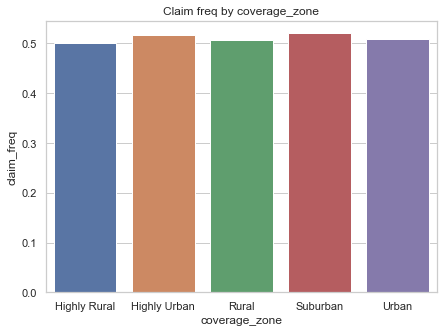

In [25]:
#group claim frequencyby coverage zone
cov= car.groupby(['coverage_zone'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(x='coverage_zone', y='claim_freq', data=cov)
plt.title('Claim freq by coverage_zone')

#### Customers in the highly urban and highly rural areas have a slightly higher claim fequency than the other zones

Text(0.5, 1.0, 'Claim frequency by car maker')

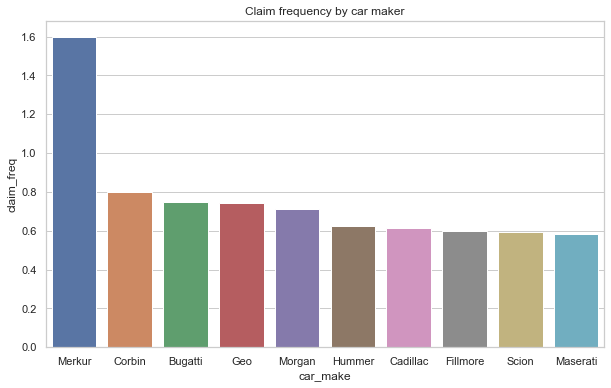

In [58]:
#group by car maker
risk= car.groupby(['car_make'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
top_10=risk.nlargest(10, 'claim_freq')
sns.barplot(x='car_make', y='claim_freq', data=top_10)
plt.title('Claim frequency by car maker')

In [27]:
#filter out the Merkur car maker and look at the various demographics that uses it
carmake= 'Merkur'
filt= car[car['car_make']== carmake]
gend= filt['gender'].value_counts()
gend.head()

Female    3
Male      2
Name: gender, dtype: int64

In [28]:
carmake= 'Merkur'
filt= car[car['car_make']== carmake]
gend= filt['household_income'].mean()
print("Average household_income of Merkur owners:" ,gend)

Average household_income of Merkur owners: 160669.61200000002


In [29]:
carmake= 'Merkur'
filt= car[car['car_make']== carmake]
gend= filt['claim_amt'].mean()
print("Average claim amount of Merkur owners:" ,gend)

Average claim amount of Merkur owners: 44354.82


In [30]:
carmake= 'Merkur'
filt= car[car['car_make']== carmake]
zon= filt['education'].value_counts()
zon.head()

Bachelors    5
Name: education, dtype: int64

####  Very few customers use the  Merkur(5) and those who do all have a bachelors degree and their average houshold income is significantly higher than the average income of customers generally.

Text(0.5, 1.0, 'Claim frequency by car color')

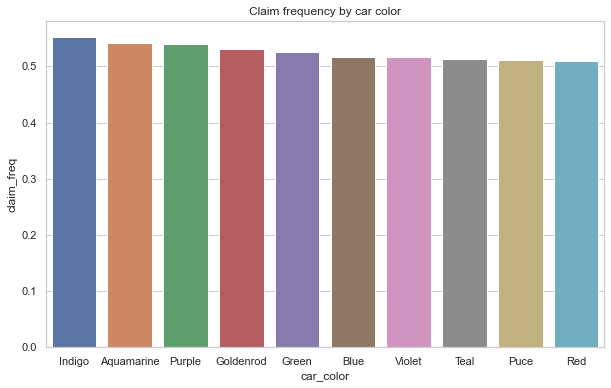

In [59]:
col= car.groupby(['car_color'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
top10=col.nlargest(10, 'claim_freq')
sns.barplot(x='car_color', y='claim_freq', data=top10)
plt.title('Claim frequency by car color')

#### Filter out the Top 3 colors and look at what they are mostly used for; Commercial or private use

In [33]:
 # Indigo
carcol= 'Indigo'
filt= car[car['car_color']== carcol]
zon= filt['car_use'].value_counts()
zon.head()

Private       1558
Commercial     383
Name: car_use, dtype: int64

In [34]:
 # Aquamarine
carcol= 'Aquamarine'
filt= car[car['car_color']== carcol]
zon= filt['car_use'].value_counts()
zon.head()

Private       1654
Commercial     366
Name: car_use, dtype: int64

In [35]:
# Purple
carcoll= 'Purple'
fillt= car[car['car_color']== carcoll]
zonn= fillt['car_use'].value_counts()
zonn.head()

Private       1539
Commercial     403
Name: car_use, dtype: int64

#### It appear they are mainly for private use which makes sense since they are flashy colors and would require frequent maintanance

Text(0.5, 1.0, 'Claim frequency by year of release')

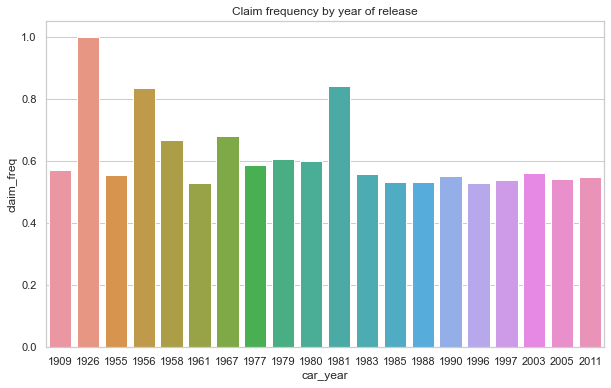

In [61]:
year= car.groupby(['car_year'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
year10=year.nlargest(20, 'claim_freq')
sns.barplot(x='car_year', y='claim_freq', data=year10)
plt.title('Claim frequency by year of release')

In [37]:
# what car make was made in the year 1926
time= 1926
fill= car[car['car_year']== time]
gend= fill['car_make'].value_counts()
gend.head()

Chrysler    4
Name: car_make, dtype: int64

In [38]:
#Overview of customers using the chrysler
speci= 1926
fifi= car[car['car_year']== speci]
fifi.head(100)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date,Age
9900,48-2454894,09/11/1993,Divorced,Private,Female,0,No,Bachelors,Chrysler,Imperial,Blue,1926,0,Highly Urban,2705.29,86874.69,1993,2023,30
25777,73-6028144,2/25/1978,Single,Private,Female,0,Yes,High School,Chrysler,Imperial,Mauv,1926,1,Urban,39866.65,117588.19,1978,2023,45
25891,27-0196445,4/25/2002,Single,Private,Male,0,No,Masters,Chrysler,Imperial,Red,1926,0,Rural,15967.83,95325.28,2002,2023,21
35054,73-2983198,2/18/1954,Married,Private,Female,0,No,Bachelors,Chrysler,Imperial,Yellow,1926,3,Highly Rural,51681.91,101849.48,1954,2023,69


Text(0.5, 1.0, 'Claim frequency by Age of customers')

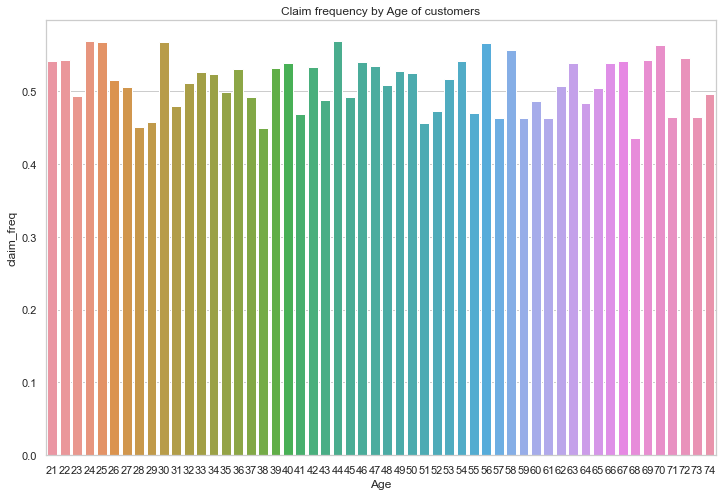

In [62]:
aj= car.groupby(['Age'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.barplot(x='Age', y='claim_freq', data=aj)
plt.title('Claim frequency by Age of customers')

### Exploring the Claim Amounts based on different demographics

In [40]:
#what is the average claim amount?
average=car['claim_amt'].mean()
print("Average amount:" ,average)


Average amount: 50028.51409621209


<Figure size 576x720 with 0 Axes>

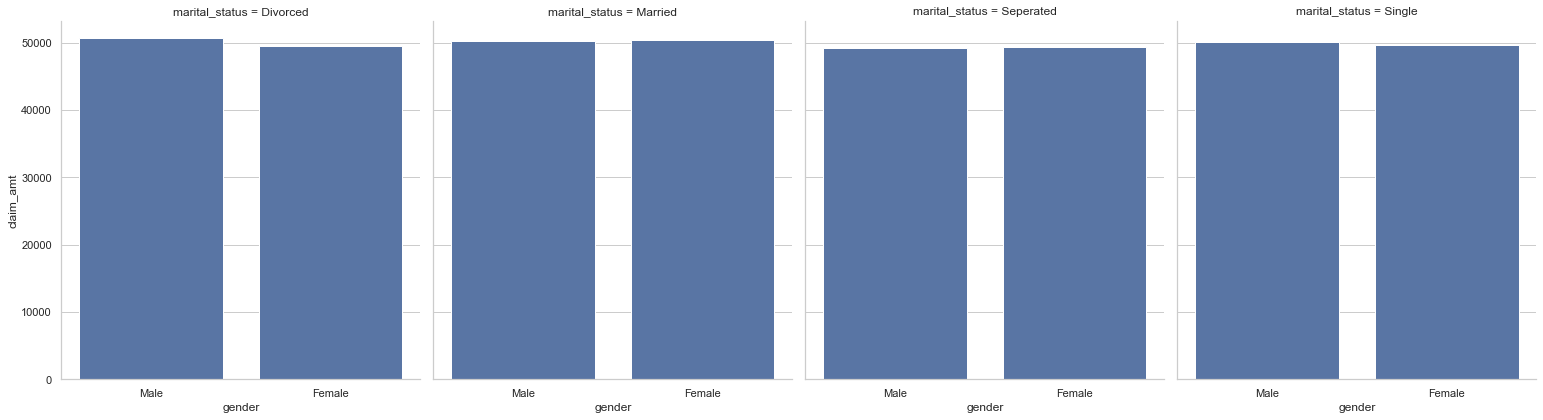

In [41]:
#The claim amounts based on gender and marital status
amts= car.groupby(['gender', 'marital_status'])['claim_amt'].mean().reset_index()
plt.figure(figsize=(8,10))
x= sns.FacetGrid(amts ,col='marital_status', height=6, aspect=.9)
x.map(sns.barplot,'gender' ,'claim_amt', order=['Male','Female'])
plt.show()

#### The claim amount of males who are divorced and single are slightly higher than females whiile the rest are basically the same

Text(0.5, 1.0, 'claim amount by Education')

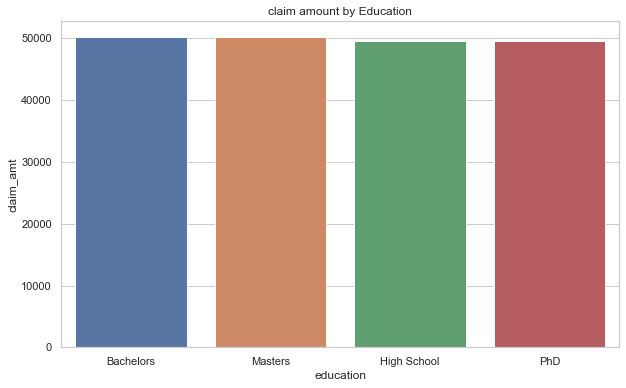

In [42]:
#group claim amount by education
educa= car.groupby(['education' ])['claim_amt'].mean().reset_index()
sort= educa.groupby('education')['claim_amt'].mean().sort_values(ascending=False).index
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x='education', y='claim_amt', data=educa, order=sort)
plt.title('claim amount by Education')

In [43]:
# group by 
reason= car.groupby(['car_use' ])['claim_freq', 'claim_amt'].mean().reset_index()
reason.head(10)

C:\Users\yinks\AppData\Local\Temp/ipykernel_10660/2047343641.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reason= car.groupby(['car_use' ])['claim_freq', 'claim_amt'].mean().reset_index()


,car_use,claim_freq,claim_amt
0,Commercial,0.498663,50005.247874
1,Private,0.513207,50034.305110


In [44]:
#group by parental status
parents= car.groupby(['parent'])['claim_amt'].mean().reset_index()
parents.head()

,parent,claim_amt
0,No,50084.902634
1,Yes,49957.452996


Text(0.5, 1.0, 'Claim amount by coverage_zone')

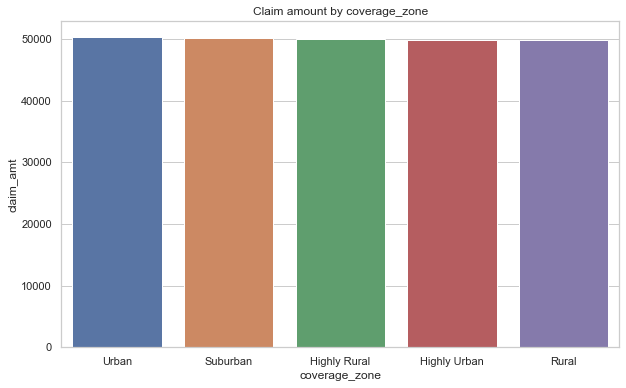

In [64]:
#group claim amount by coverage zone
covv= car.groupby(['coverage_zone'])['claim_amt'].mean().reset_index()
sortt= covv.groupby('coverage_zone')['claim_amt'].mean().sort_values(ascending=False).index
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x='coverage_zone', y='claim_amt', data=covv, order= sortt)
plt.title('Claim amount by coverage_zone')

Text(0.5, 1.0, 'Claim amount by car maker')

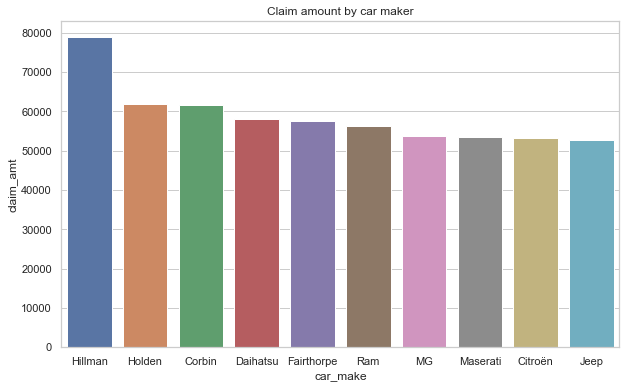

In [65]:
#group by car make
riskk= car.groupby(['car_make'])['claim_amt'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
top_1=riskk.nlargest(10, 'claim_amt')
sns.barplot(x='car_make', y='claim_amt', data=top_1)
plt.title('Claim amount by car maker')

#### Filter out the Top car maker with the highest claim amount that customers use

In [47]:
carmake= 'Hillman'
aim= car[car['car_make']== carmake]
caim= aim['household_income'].mean()
print("Average household_income of Hillman owners:" ,caim)

Average household_income of Hillman owners: 171067.77333333332


In [48]:
carmake= 'Hillman'
aim= car[car['car_make']== carmake]
caim= aim['claim_freq'].mean()
print("Average claim_freq of Hillman owners:" ,caim)

Average claim_freq of Hillman owners: 0.0


#### The average income of 'Hillman' users is signficantly higher than the average income of customers generally and they have an average  claim frequency of 0.0 which means they have never claimed their insurance

In [49]:
#Overview of customers using the Hillman
speci= 'Hillman'
fifi= car[car['car_make']== speci]
fifi.head(100)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date,Age
10382,87-5865221,5/20/1993,Seperated,Commercial,Female,0,No,High School,Hillman,Minx Magnificent,Yellow,1950,0,Rural,68352.98,185192.20,1993,2023,30
23498,71-0538334,01/02/1955,Single,Commercial,Female,0,No,Bachelors,Hillman,Minx Magnificent,Pink,1950,0,Suburban,74486.57,223934.28,1955,2023,68
37148,96-0595357,1/26/1982,Single,Commercial,Female,1,Yes,Bachelors,Hillman,Minx Magnificent,Khaki,1950,0,Suburban,94308.73,104076.84,1982,2023,41


<AxesSubplot:xlabel='car_color', ylabel='claim_amt'>

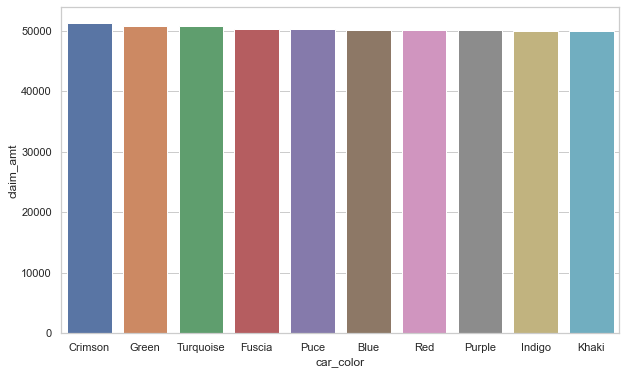

In [50]:
coll= car.groupby(['car_color'])['claim_amt'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
topp=coll.nlargest(10, 'claim_amt')
sns.barplot(x='car_color', y='claim_amt', data=topp)

<AxesSubplot:xlabel='Age', ylabel='claim_amt'>

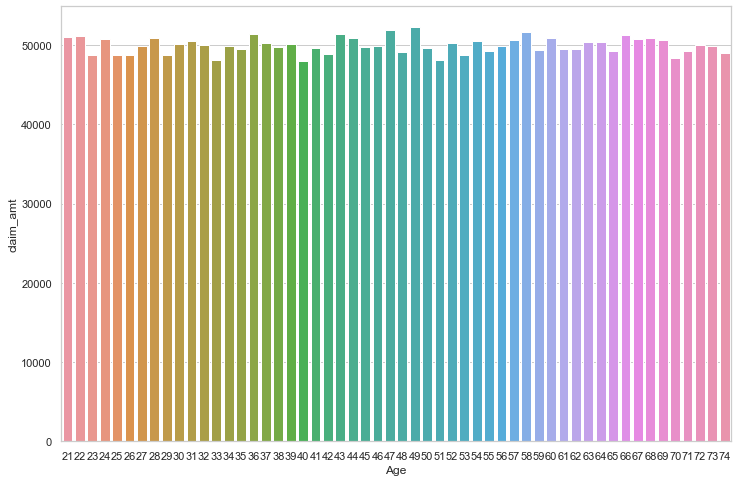

In [51]:
ag= car.groupby(['Age'])['claim_amt'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.barplot(x='Age', y='claim_amt', data=ag)

### Lets take a look at household income by car maker and what customers with highest income use the cars for

<AxesSubplot:xlabel='car_make', ylabel='household_income'>

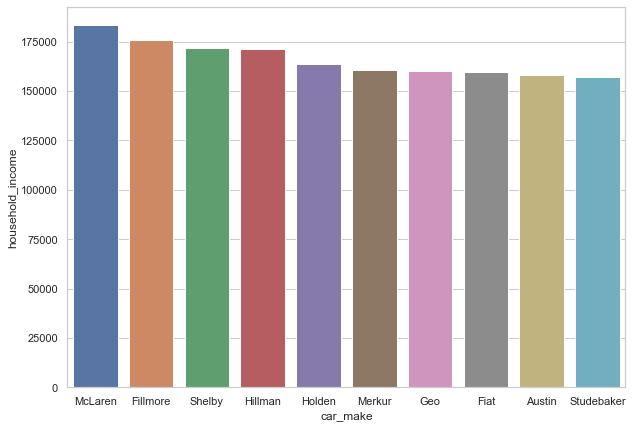

In [52]:
hold= car.groupby(['car_make'])['household_income'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
top_1=hold.nlargest(10, 'household_income')
sns.barplot(x='car_make', y='household_income', data=top_1)

In [53]:
#Top 3 car makers by household income
hol= 'McLaren'
filtt= car[car['car_make']== hol]
zone= filtt['car_use'].value_counts()
zone.head()

Private       8
Commercial    2
Name: car_use, dtype: int64

In [54]:
hol= 'Fillmore'
fitt= car[car['car_make']== hol]
zo= fitt['car_use'].value_counts()
zo.head()

Private    5
Name: car_use, dtype: int64

In [55]:
shel= 'Shelby'
ft= car[car['car_make']== shel]
bi= ft['car_use'].value_counts()
bi.head()

Private    9
Name: car_use, dtype: int64

#### It appears its mostly for private use which makes sense since commercial cars wont be abble to maintain flash and expensive colors

In [56]:
#Overview of customers using the McLaren
speci= 'McLaren'
fifi= car[car['car_make']== speci]
fifi.head(100)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date,Age
1445,98-5272203,05/07/1962,Single,Commercial,Male,0,No,High School,McLaren,MP4-12C,Green,2012,0,Rural,58072.27,173545.54,1962,2023,61
2231,37-1304406,11/20/1949,Married,Commercial,Female,0,No,High School,McLaren,MP4-12C,Green,2012,1,Highly Urban,26650.70,198898.49,1949,2023,74
3308,92-3090214,07/11/1962,Seperated,Private,Female,0,No,Bachelors,McLaren,MP4-12C,Violet,2012,0,Suburban,79724.31,218371.69,1962,2023,61
5518,54-9454531,12/27/1962,Single,Private,Female,0,Yes,Masters,McLaren,MP4-12C,Yellow,2012,0,Highly Rural,31980.03,114941.26,1962,2023,61
8199,33-3002863,9/20/1955,Married,Private,Female,0,No,High School,McLaren,MP4-12C,Mauv,2012,0,Rural,28614.36,204034.70,1955,2023,68
10811,57-3830063,04/06/1958,Married,Private,Male,0,No,Bachelors,McLaren,MP4-12C,Yellow,2012,1,Suburban,56475.40,214782.39,1958,2023,65
13510,92-5534398,06/08/1966,Single,Private,Female,0,No,PhD,McLaren,MP4-12C,Yellow,2012,0,Highly Rural,77050.86,201324.49,1966,2023,57
14827,78-2782915,04/08/1963,Single,Private,Male,0,No,Masters,McLaren,MP4-12C,Mauv,2012,0,Highly Urban,8271.06,217919.16,1963,2023,60
16149,87-7671851,12/23/1979,Single,Private,Male,0,No,PhD,McLaren,MP4-12C,Orange,2012,0,Suburban,35037.28,60349.87,1979,2023,44
21884,35-3632519,7/24/1954,Seperated,Private,Female,0,No,Bachelors,McLaren,MP4-12C,Mauv,2012,0,Highly Rural,34331.10,230381.53,1954,2023,69
